In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False, hline=True):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')
    
    # Plot a horizontal line at y=0
    if hline:
        plt.axhline(0, color='black', lw=0.5)

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'logs/log.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,D/loss_real,D/loss_fake,D/loss_cls,D/loss_dom,D/loss_gp,D/loss_td_real,D/loss_td_fake,G/loss_fake,G/loss_rec,G/loss_cls,G/loss_dom,G/loss_rot,G/loss_td_fake
0,0:00:07,100,0.0295,0.0092,0.9262,4.1439,0.0392,-7.1256,1.9785,-0.0177,0.2290,0.9210,4.1484,0.2435,-1.9886
1,0:00:11,200,-0.0571,0.0394,0.9120,4.1538,0.0170,-2.2216,-0.4599,-0.0311,0.1478,0.8860,4.1493,0.1485,0.3743
2,0:00:16,300,-0.0063,0.0029,1.0408,4.1791,0.0070,-1.2851,-0.5063,-0.0125,0.1248,1.0407,4.1782,0.1372,0.5779
3,0:00:21,400,-0.0097,0.0119,1.1806,4.1112,0.0089,-1.1017,-0.6700,0.0109,0.1137,1.1595,4.1098,0.1595,0.5484
4,0:00:25,500,0.0011,0.0090,1.0918,4.1344,0.0073,-0.3523,-1.3705,-0.0012,0.0990,1.0687,4.1404,0.1295,1.2189


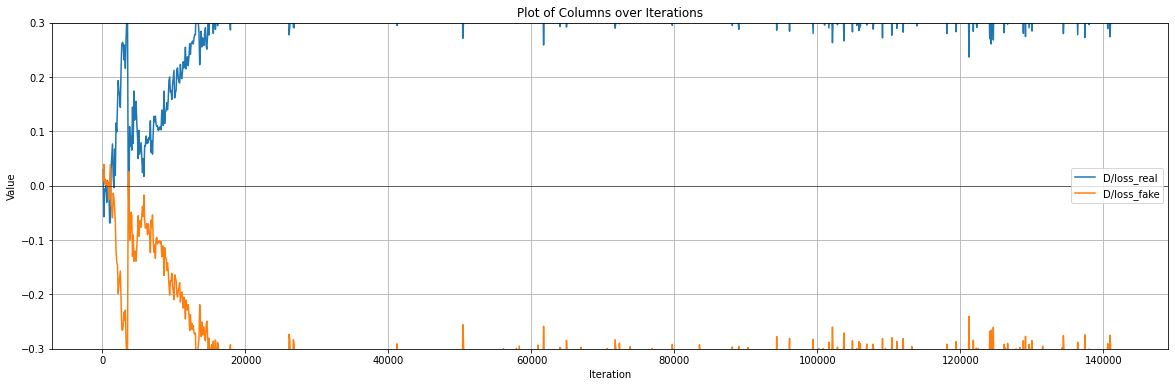

In [4]:
plot_columns(history, ['D/loss_real', 'D/loss_fake'], logaxis=False, ylim=(-0.3, 0.3))

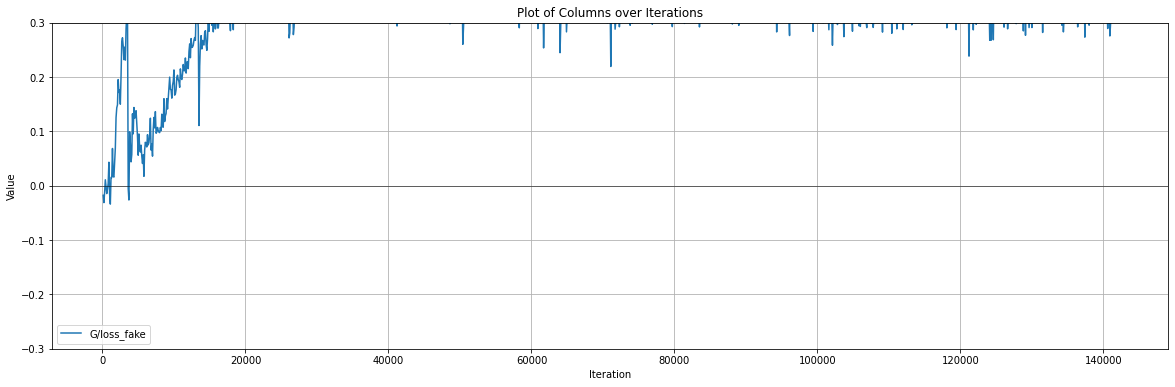

In [5]:
plot_columns(history, ['G/loss_fake'], logaxis=False, ylim=(-0.3, 0.3))

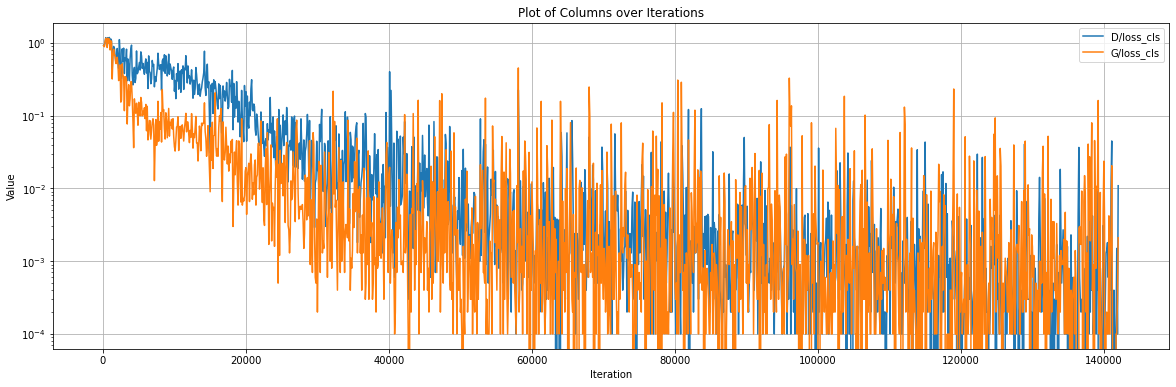

In [6]:
plot_columns(history, ['D/loss_cls', 'G/loss_cls'], logaxis=True)

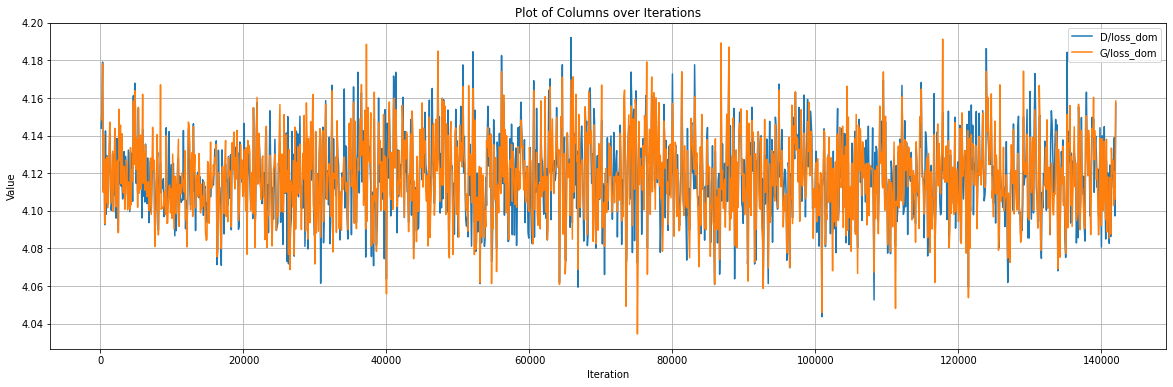

In [7]:
plot_columns(history, ['D/loss_dom', 'G/loss_dom'], logaxis=False, hline=False)

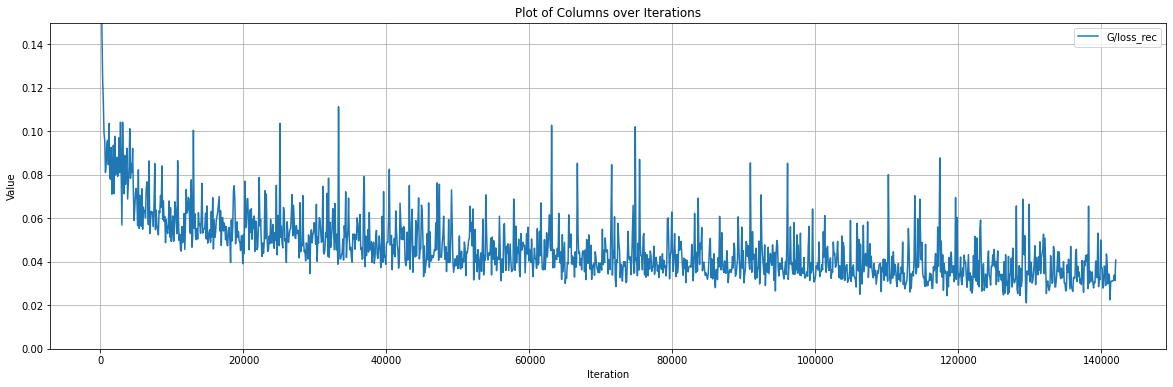

In [8]:
plot_columns(history, ['G/loss_rec'], logaxis=False, ylim=(0, 0.15))

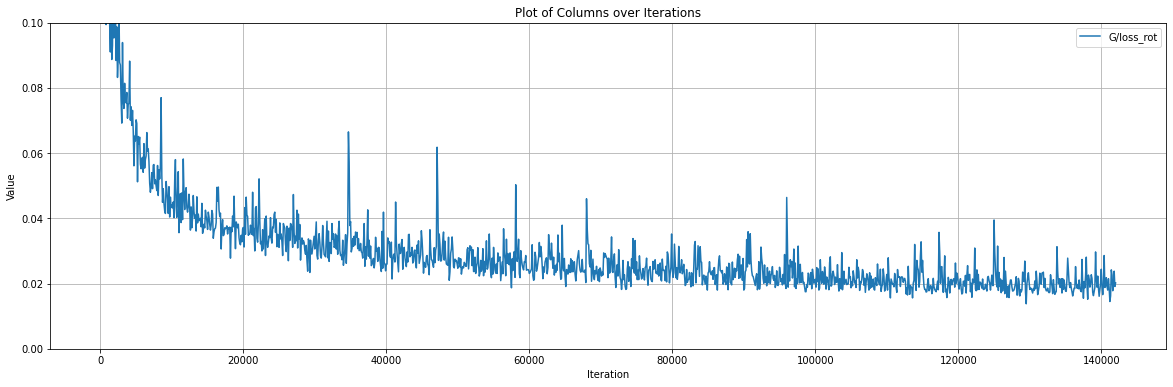

In [9]:
plot_columns(history, ['G/loss_rot'], logaxis=False, hline=False, ylim=(0, 0.1))

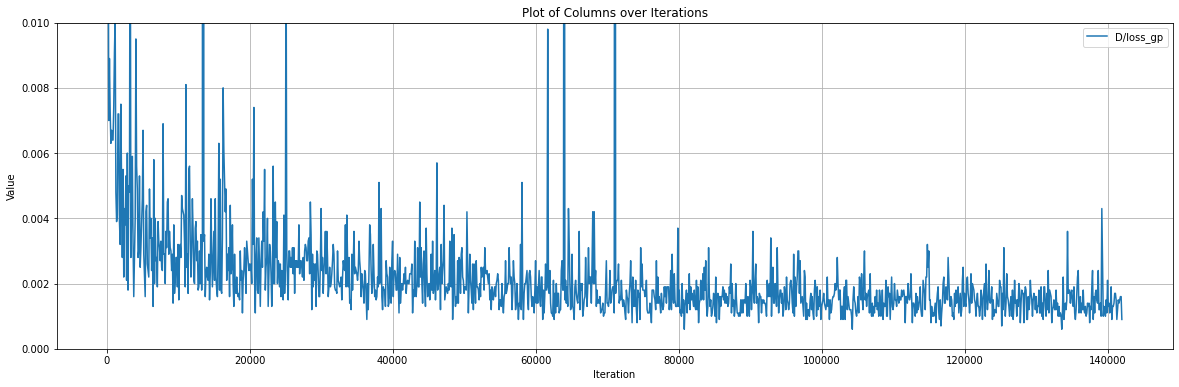

In [10]:
plot_columns(history, ['D/loss_gp'], logaxis=False, ylim=(0, 0.01))

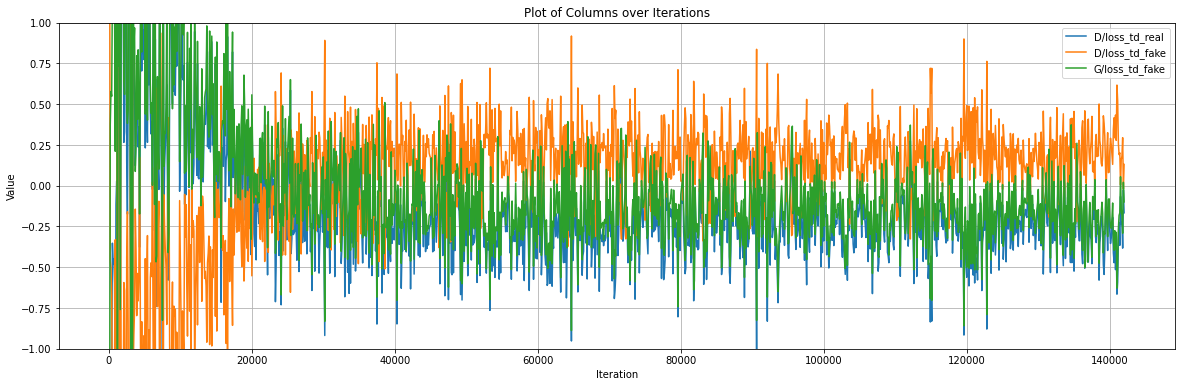

In [11]:
plot_columns(history, ['D/loss_td_real', 'D/loss_td_fake', 'G/loss_td_fake'], logaxis=False, hline=False, ylim=(-1, 1))

# Metrics

## TSTR Score

In [12]:
file_path = 'results/mobiact_realworld_TSTR.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,domain,loss,accuracy,f1
0,10000,61,9.422821,0.260,0.121690
1,10000,62,9.601259,0.245,0.114603
2,10000,63,4.498552,0.485,0.404861
3,10000,64,6.013298,0.330,0.268866
4,10000,65,9.411270,0.250,0.118276


Maximum average accuracy: 0.3271 at step 90000
Maximum average F1 score: 0.2652 at step 20000


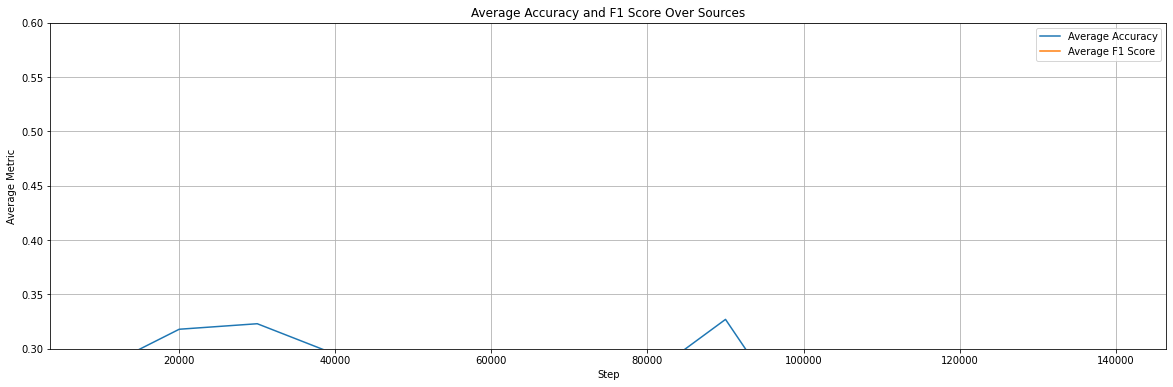

Minimum average loss: 5.0290 at step 20000


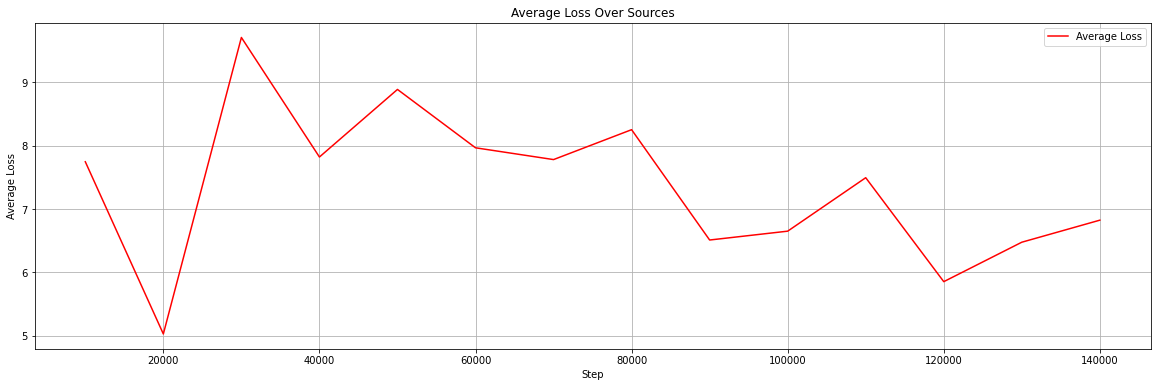

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics(metrics, ylim=None):
    # Filter the DataFrame based on the metrics
    filtered_data = metrics

    # Group by 'step' and then calculate the mean across 'source' and 'domain'
    mean_data = filtered_data.groupby(['step']).agg({'accuracy': 'mean', 'f1': 'mean', 'loss': 'mean'}).reset_index()

    # Plotting accuracy and F1 scores in the same plot
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data['accuracy'], label='Average Accuracy')
    plt.plot(mean_data['step'], mean_data['f1'], label='Average F1 Score')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Find the maximum value of accuracy and F1 score and their corresponding steps
    max_accuracy = mean_data['accuracy'].max()
    max_accuracy_step = mean_data[mean_data['accuracy'] == max_accuracy]['step'].values[0]
    print(f'Maximum average accuracy: {max_accuracy:.4f} at step {max_accuracy_step}')
    
    max_f1 = mean_data['f1'].max()
    max_f1_step = mean_data[mean_data['f1'] == max_f1]['step'].values[0]
    print(f'Maximum average F1 score: {max_f1:.4f} at step {max_f1_step}')

    plt.title('Average Accuracy and F1 Score Over Sources')
    plt.xlabel('Step')
    plt.ylabel('Average Metric')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting loss in a separate plot
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data['loss'], label='Average Loss', color='red')
    
    # Find the minimum value of the loss and its corresponding step
    min_loss = mean_data['loss'].min()
    min_loss_step = mean_data[mean_data['loss'] == min_loss]['step'].values[0]
    print(f'Minimum average loss: {min_loss:.4f} at step {min_loss_step}')

    plt.title('Average Loss Over Sources')
    plt.xlabel('Step')
    plt.ylabel('Average Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_metrics(classification_scores, ylim=(0.3, 0.6))